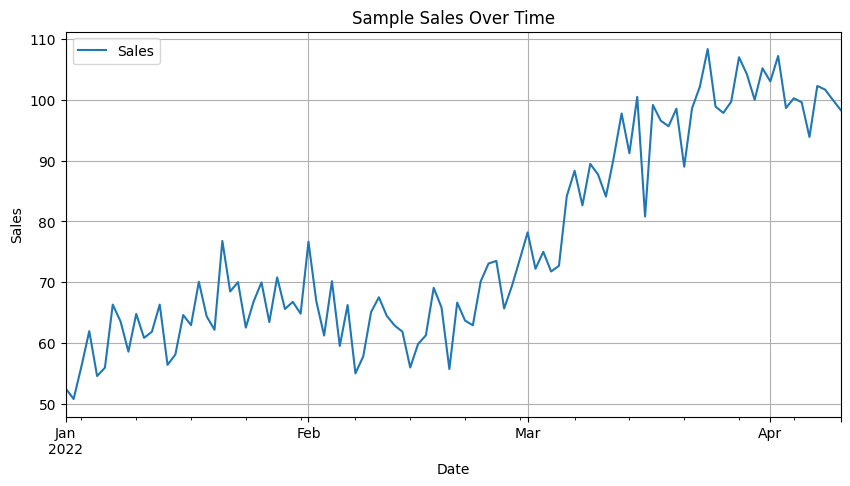

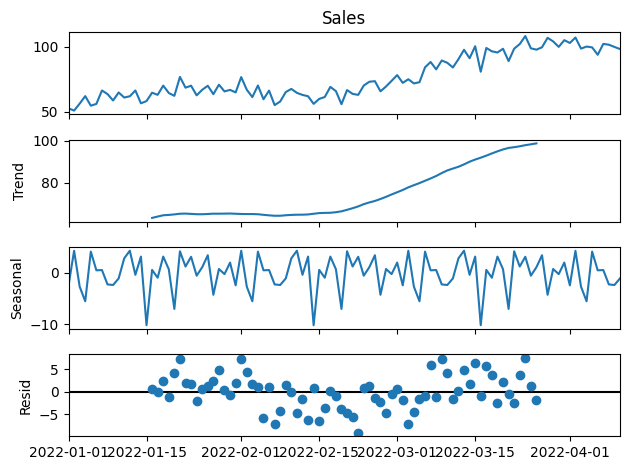

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


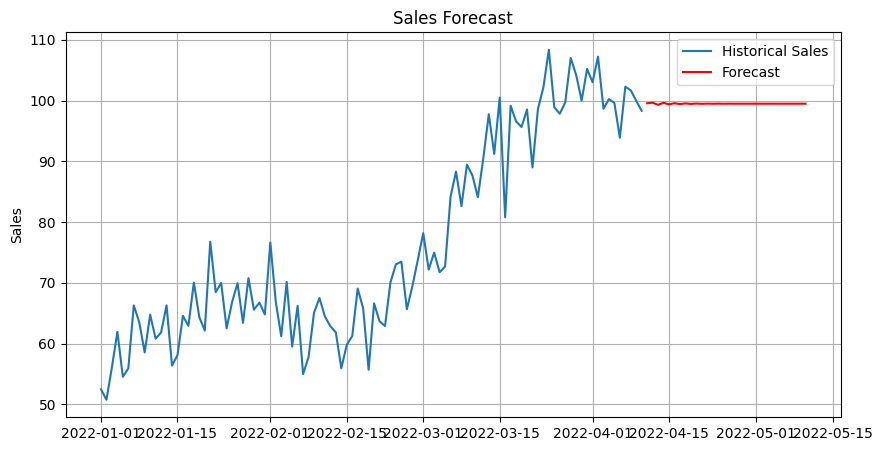

In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a date range
dates = pd.date_range(start='2022-01-01', periods=100, freq='D')

# Generate some fake sales data with a trend and seasonality
np.random.seed(42)
sales = 50 + 0.5 * np.arange(100) + 10 * np.sin(np.linspace(0, 3 * np.pi, 100)) + np.random.normal(0, 5, 100)

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Sales': sales})
df.set_index('Date', inplace=True)

# Plot it
df.plot(figsize=(10, 5), title="Sample Sales Over Time")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Sales'], model='additive', period=30)  # Monthly seasonality (approx.)

# Plot the decomposition
decomposition.plot()
plt.tight_layout()
plt.show()

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (auto settings for simplicity)
model = ARIMA(df['Sales'], order=(2, 1, 2))  # (p,d,q) parameters
fitted_model = model.fit()

# Forecast next 30 days
forecast = fitted_model.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label='Historical Sales')
plt.plot(pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title("Sales Forecast")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

